In [1]:
import logomaker
import pandas as pd
import numpy as np
from Bio import motifs
import matplotlib.pyplot as plt


In [2]:
def pwm_to_ic(pwm):
    background_probs = {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}
    
    # Calculate information content for each base at each position
    ic_matrix = pd.DataFrame(index=pwm.index, columns=pwm.columns)
    
    for base in pwm.columns:
        # Calculate IC for each base at each position
        ic_matrix[base] = pwm[base] * np.log2(pwm[base] / background_probs[base])
    
    return ic_matrix

def read_meme_plaintext(filename):
    with open(filename, 'r') as f:
        pwm = []
        for _ in range(11):
            next(f)
        for line in f:
            if line.startswith('URL'):
                continue
            else:
                row = [float(x) for x in line.strip().split()]
                pwm.append(row)
        
        motif=pwm_to_ic(pd.DataFrame(pwm, columns=['A', 'C', 'G', 'T']))
                      
    return motif

def read_zoonomia_pwm(filename):
    with open(filename, 'r') as f:
        pwm = []
        for line in f:
            if line.startswith('A'):
                continue
            else:
                row = [float(x) for x in line.strip().split()]
                pwm.append(row)
        
        motif=pd.DataFrame(pwm, columns=['A', 'C', 'G', 'T'])
                      
    return motif

def reverse_complement(pwm):
    reverse=np.flipud(np.array(pwm))
    reverse_complement_pwm=reverse[:,[3,2,1,0]]
    rc_pwm=pd.DataFrame(reverse_complement_pwm, columns=['A', 'C', 'G', 'T'])
    
    return rc_pwm

def plot_logo(motif,plotname):
    logo = logomaker.Logo(motif)
    logo.ax.set_ylim([0, 2])  
    logo.ax.spines['top'].set_visible(False)
    logo.ax.spines['right'].set_visible(False)
    logo.ax.spines['left'].set_visible(False)
    logo.ax.spines['bottom'].set_visible(False)
    logo.ax.xaxis.set_ticks_position('none')
    logo.ax.yaxis.set_ticks_position('none')
    logo.ax.set_yticklabels([])  # Remove y-axis tick labels
    logo.ax.set_xticklabels([])  # Remove x-axis tick labels (just in case)
    plt.savefig(plotname, format="png", bbox_inches="tight")   
    plt.show() 


In [3]:
dir='/zata/data/zlab/zusers/gaomingshi/index/motif/hocomoco_v12/'
dir1='/zata/data/zlab/zusers/gaomingshi/motif/zoonomia/ppm/'

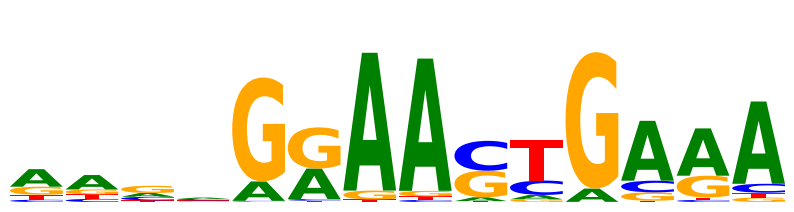

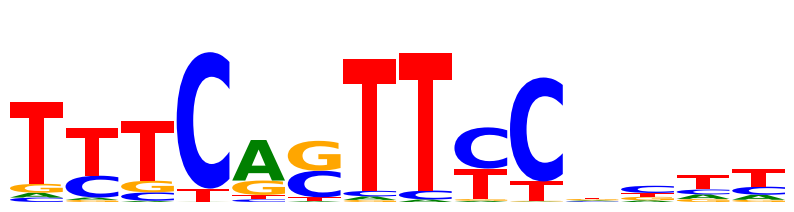

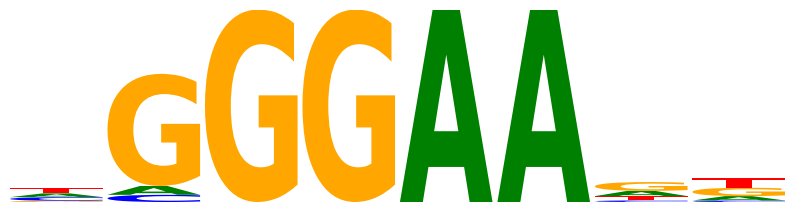

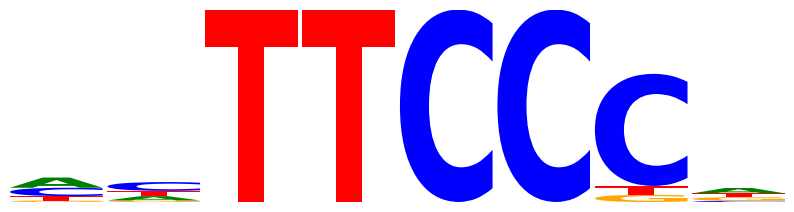

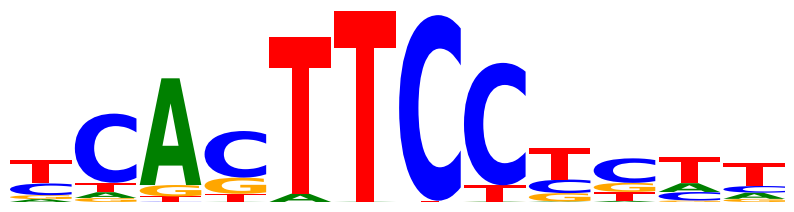

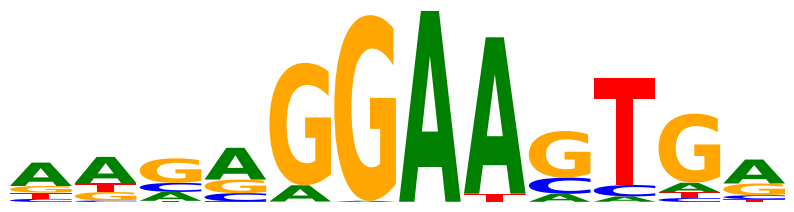

In [5]:
for tf in ['IRF4','IKZF1','BCL11A']:
    motif=read_zoonomia_pwm(dir1+tf+'.tsv')
    plot_logo(motif.fillna(0),tf+'.png')
    rc=reverse_complement(motif.fillna(0))
    plot_logo(rc,'pdf/'+tf+'.reverse_complement.png')

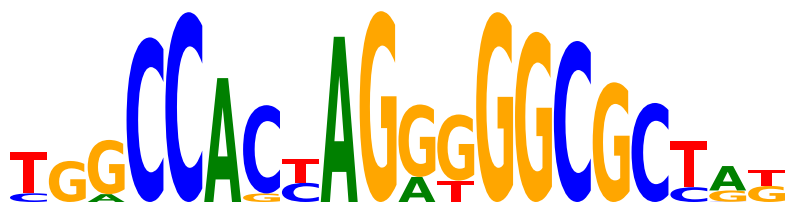

In [6]:
tf='CTCF'
file='CTCF.H12CORE.0.P.B'
motif=read_meme_plaintext(dir+file+'.meme')
plot_logo(motif.fillna(0),tf+'.png')